# Conexão com postgres e Histórias de Usuários

## Instalando biblioteca de acesso com postgres

In [11]:
!pip install --user psycopg2-binary
!pip install --user seaborn

You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


### Importando biblioteca psycopg2 e Configurando conexão e usando cursosr

In [15]:
import psycopg2
conn = psycopg2.connect(host="localhost",database="bd", user="postgres", password="aluno")

## Obtendo dados do database com Pandas

In [16]:
!pip install --user pandas

You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [17]:
import pandas as pd

# Historia 1

### Objetivo: Obter o número carros capturados por um semáforo<br>  Peso Planing Poker: 3

Código para obtenção do resultado:

In [5]:
result2 = pd.read_sql_query("""
                            select (count(data_captura)) from captura 
                            where hora >1 and hora <7;
                            """,conn)

In [6]:
result2

,count
0,1


# História 2

### Objetivo: Obter quantidade de usuários cadastrado<br>  Peso Planing Poker: 1

codigo para obtenção do resultado:

In [7]:
result = pd.read_sql_query("""
                            select count (cod_usuario) from usuario;                            
                            """,conn)

In [8]:
result

,count
0,15


# História 3

### Objetivo: Obter quantidade de semáforos cadastrados em uma determinada cidade<br>  Peso Planing Poker: 8


In [20]:
result3 = pd.read_sql_query("""
                            select semaforo.cod_semaforo,mapa.desc_cidade 
                            from mapa inner join semaforo
                            on semaforo.cidade = mapa.cidade
                            where mapa.cidade = 2;
                            """,conn)

In [21]:
result3

,cod_semaforo,desc_cidade
0,20,Cariacica
1,30,Cariacica
2,40,Cariacica
3,50,Cariacica
4,20,Cariacica
5,30,Cariacica
6,40,Cariacica
7,50,Cariacica
8,20,Cariacica
9,30,Cariacica


# História 4

### Objetivo: Obter das vias e suas velocidade média dos carros<br>  Peso Planing Poker: 8


In [185]:
result4 = pd.read_sql_query("""
                            select Sensor.cod_sensor,Capturas.velocidade
                            from Capturas inner join Sensor
                            on Sensor.cod_sensor = Capturas.cod_sensor
                            order by Capturas.velocidade
                            """,conn)

In [187]:
result4

,cod_sensor,velocidade
0,3,50
1,9,58


# História 5


### Objetivo: Obter os usuários que são operários e que obtém a Letra A no nome <br>  Peso Planing Poker: 4


In [199]:
result5 = pd.read_sql_query("""
                            select nome_usuario, tipo
                            from usuario where tipo = 'o' and nome_usuario like '%n%';
                            """,conn)

In [200]:
result5

,nome_usuario,tipo
0,Geoavana,o
1,Nenê,o
2,Adriana,o
3,Iana,o


# História 6

### Objetivo: Obter dos logradouros os que começam em Av<br>  Peso Planing Poker: 3


In [206]:
result70 = pd.read_sql_query("""
                            select desc_logra, logra
                            from mapa where desc_logra like 'Av%';
                            """,conn)

In [207]:
result70

,desc_logra,logra
0,Av da Penha,5
1,Av Mata da Serra,10


# História 7

### Objetivo: Listar funcionários operários que começam com a letra R<br>  Peso Planing Poker: 3

In [216]:
result71 = pd.read_sql_query("""
                            select count (nome_usuario) from usuario where nome_usuario like 'R%' and tipo = 'o';                            
                            """,conn)

In [217]:
result71

,count
0,0


Alternativamente podemos aplicar estilos a tabela para melhor formatação

In [25]:
import seaborn as sns
df = pd.DataFrame(result)
cm = sns.light_palette("green", as_cmap=True)
df.style.background_gradient(cmap=cm)


,departamento,media_de_salarios_dep
0,Engenharia Civil,2266.67
1,Engenharia Mecânica,2500
2,Contabilidade,5150


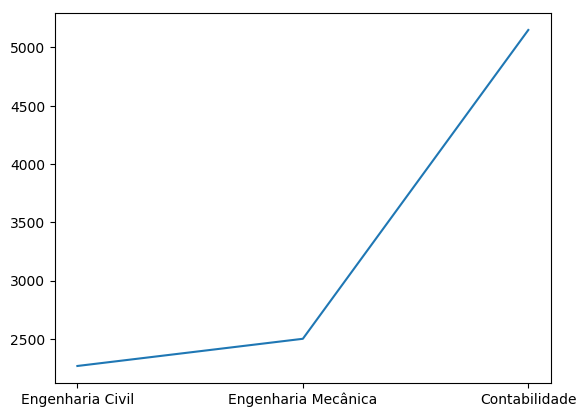

In [26]:
import matplotlib.pyplot as plt
plt.plot(df.departamento, df.media_de_salarios_dep)


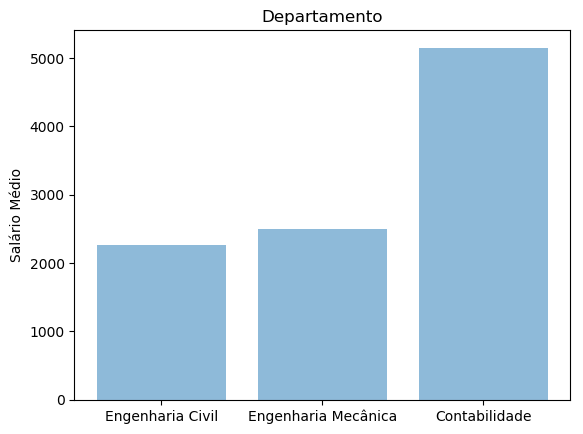

In [19]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = tuple(df.departamento)
y_pos = np.arange(len(objects))
performance = list(df.media_de_salarios_dep)
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Salário Médio')
plt.title('Departamento')
 
plt.show()

References

https://pandas.pydata.org/pandas-docs/stable/style.html <br>
https://pythonspot.com/matplotlib-bar-chart/

### 9.1	CONSULTAS DAS TABELAS COM TODOS OS DADOS INSERIDOS (Todas) 


In [36]:
result8 = pd.read_sql_query("""
                             select * from usuario;
                            """,conn)

In [37]:
result8

,tipo,cod_usuario,nome_usuario,senha_usuario,email,telefone,sexo
0,c,1010,Renato,re12345,renat@email.com,999043437,M
1,c,2020,Cláudio,clsa3232,claudio@email.com,994387292,M
2,c,3030,Erick,hehehe,erick@email.com,999982493,M
3,c,4040,Flávia,flavinha332,flavia@email.com,869979054,F
4,o,5050,Geoavana,88776,geova@email.com,987765543,F
5,c,6060,Brenner,cabecademelao,brenner@email.com,977698985,M
6,o,7070,Nenê,ostempos,nena@email.com,999043437,M
7,c,8080,Aguirre,2001,guirre@email.com,999043437,M
8,o,9090,Adriana,33412333,adrinaa@email.com,999043437,F
9,c,2220,Fabíola,291201,fabii@email.com,99869953,F


In [48]:
result9 = pd.read_sql_query("""
                             select * from semaforo;
                            """,conn)

In [152]:
result9

,tempo_aberto,tempo_fechado,latitude,longitude,cod_semaforo,cidade,bairro,logra,cod_sensor
0,30,30,3213,4234,10,1,1,15,1
1,15,45,7341,8743,20,2,2,1,2
2,12,48,1239,976,30,2,2,2,3
3,50,10,4543,1280,40,2,4,3,4
4,32,28,1321,4313,50,2,5,4,5
5,45,5,5433,1233,60,3,6,5,5
6,30,30,4640,7688,70,3,7,6,6
7,30,30,5775,4986,80,3,8,7,7
8,31,39,8676,6877,90,3,9,8,8
9,20,40,3213,746,100,4,10,9,8


In [153]:
result10 = pd.read_sql_query("""
                             select * from sensor;
                            """,conn)

In [154]:
result10

,latitude,longitude,cod_sensor,modelo
0,3213,3125,1,KJH98
1,4314,1223,2,BCG62
2,4513,7659,3,ASF53
3,8743,8980,4,KGB12
4,1243,3233,5,NMJ89
5,5478,7565,6,PIO09
6,8945,2456,7,LKI90
7,3323,7657,8,VCF52
8,4432,8998,9,AYW12
9,7776,4323,10,AQW22


In [41]:
result11 = pd.read_sql_query("""
                             select * from captura;
                            """,conn)

In [42]:
result11

,data_captura,dia,mes,ano,hora,minuto,velocidade,cod_semaforo,cod_sensor
0,2014-07-02 06:14:25,2,7,2014,6,14,50,1010,None
1,2016-12-10 22:55:25,12,10,2016,22,55,35,2020,None
2,2017-02-28 12:01:25,28,2,2017,12,1,58,2020,None


In [45]:
result12 = pd.read_sql_query("""
                             select * from mapa;
                            """,conn)

In [47]:
result12

,cidade,desc_cidade,bairro,desc_bairro,logra,desc_logra,cep,cod_semaforo
0,1,N.Venécia,1,Mizacity,15,Rua da Madeira,10010015,10
1,2,Cariacica,2,Campo Grande,1,Rua Dois,10020001,20
2,2,Cariacica,2,Campo Grande,2,Rua Barracada,10020002,30
3,2,Cariacica,4,Cobilândia,3,Rua Rei,20040003,40
4,2,Cariacica,5,Duandra,4,Rua Catupiry,20050004,50
5,3,Vitória,6,Vitorinha,5,Av da Penha,30060005,60
6,3,Vitória,7,Mouchoara,6,Rua Taquara,30070006,70
7,3,Vitória,8,Centro,7,Rua Santo Antonio,30080007,80
8,3,Vitória,9,Penha,8,Nossa Senhora,30090008,90
9,3,Vitória,10,Marataises,9,Rua Moreira,30100009,100


### 9.2	CONSULTAS DAS TABELAS COM FILTROS WHERE (Mínimo 4)


In [50]:
result7 = pd.read_sql_query("""
                             select * from usuario where cod_usuario = 1010;
                            """,conn)

In [51]:
result7

,tipo,cod_usuario,nome_usuario,senha_usuario,email,telefone,sexo
0,c,1010,Renato,re12345,renat@email.com,999043437,M


In [57]:
result13 = pd.read_sql_query("""
                             select * from usuario where nome_usuario = 'Renato';
                            """,conn)

In [58]:
result13

,tipo,cod_usuario,nome_usuario,senha_usuario,email,telefone,sexo
0,c,1010,Renato,re12345,renat@email.com,999043437,M


In [56]:
result14 = pd.read_sql_query("""
                             select * from usuario where tipo = 'o';
                            """,conn)

In [59]:
result14

,tipo,cod_usuario,nome_usuario,senha_usuario,email,telefone,sexo
0,o,5050,Geoavana,88776,geova@email.com,987765543,F
1,o,7070,Nenê,ostempos,nena@email.com,999043437,M
2,o,9090,Adriana,33412333,adrinaa@email.com,999043437,F
3,o,2300,Iana,Ch923,iana@email.com,898908964,F


### 9.3	CONSULTAS QUE USAM OPERADORES LÓGICOS, ARITMÉTICOS E TABELAS OU CAMPOS RENOMEADOS (Mínimo 11)


In [61]:
result15 = pd.read_sql_query("""
                             select * from mapa where cidade = 2;
                            """,conn)

In [62]:
result15

,cidade,desc_cidade,bairro,desc_bairro,logra,desc_logra,cep,cod_semaforo
0,2,Cariacica,2,Campo Grande,1,Rua Dois,10020001,20
1,2,Cariacica,2,Campo Grande,2,Rua Barracada,10020002,30
2,2,Cariacica,4,Cobilândia,3,Rua Rei,20040003,40
3,2,Cariacica,5,Duandra,4,Rua Catupiry,20050004,50


In [63]:
result16 = pd.read_sql_query("""
                             select * from mapa where bairro > 4 and bairro < 9;
                            """,conn)

In [64]:
result16

,cidade,desc_cidade,bairro,desc_bairro,logra,desc_logra,cep,cod_semaforo
0,2,Cariacica,5,Duandra,4,Rua Catupiry,20050004,50
1,3,Vitória,6,Vitorinha,5,Av da Penha,30060005,60
2,3,Vitória,7,Mouchoara,6,Rua Taquara,30070006,70
3,3,Vitória,8,Centro,7,Rua Santo Antonio,30080007,80


In [65]:
result17 = pd.read_sql_query("""
                             select desc_bairro from mapa where logra > 10 and logra<20;
                            """,conn)

In [66]:
result17

,desc_bairro
0,Mizacity
1,Serra Dourada
2,Serra Dourada 2
3,Porto Dourado
4,Bicanga


In [71]:
result18 = pd.read_sql_query("""
                             select * from mapa where logra < 4;
                            """,conn)

In [72]:
result18

,cidade,desc_cidade,bairro,desc_bairro,logra,desc_logra,cep,cod_semaforo
0,2,Cariacica,2,Campo Grande,1,Rua Dois,10020001,20
1,2,Cariacica,2,Campo Grande,2,Rua Barracada,10020002,30
2,2,Cariacica,4,Cobilândia,3,Rua Rei,20040003,40


In [73]:
result19 = pd.read_sql_query("""
                             select * from mapa where cidade = 1 or cidade = 5 ;
                            """,conn)

In [74]:
result19

,cidade,desc_cidade,bairro,desc_bairro,logra,desc_logra,cep,cod_semaforo
0,1,N.Venécia,1,Mizacity,15,Rua da Madeira,10010015,10
1,5,Vila Velha,15,Bicanga,14,Bairro da Paz,50150014,150


In [82]:
result20 = pd.read_sql_query("""
                             select desc_cidade,desc_logra from mapa where logra < 5 ;
                            """,conn)

In [83]:
result20

,desc_cidade,desc_logra
0,Cariacica,Rua Dois
1,Cariacica,Rua Barracada
2,Cariacica,Rua Rei
3,Cariacica,Rua Catupiry


In [18]:
result21 = pd.read_sql_query("""
                             select nome_usuario as Nome from usuario where sexo = 'F';
                            """,conn)

In [19]:
result21

,nome
0,Flávia
1,Geoavana
2,Adriana
3,Fabíola
4,Iana
5,Jandira


In [92]:
result22 = pd.read_sql_query("""
                             select * from semaforo where tempo_aberto < 20;
                            """,conn)

In [93]:
result22

,tempo_aberto,tempo_fechado,latitude,longitude,cod_semaforo,cidade,bairro,logra,cod_sensor
0,15,45,7341,8743,20,2,2,1,2
1,12,48,1239,976,30,2,2,2,3
2,16,44,5689,7654,130,4,13,12,11


In [28]:
result23 = pd.read_sql_query("""
                             select * from semaforo where tempo_aberto > 35 and tempo_aberto <55;
                            """,conn)

In [97]:
result23

,tempo_aberto,tempo_fechado,latitude,longitude,cod_semaforo,cidade,bairro,logra,cod_sensor
0,50,10,4543,1280,40,2,4,3,4
1,45,5,5433,1233,60,3,6,5,5
2,37,23,9870,1988,110,4,11,10,9


In [22]:
result24 = pd.read_sql_query("""
                             select desc_bairro as Bairro_Nome from mapa where desc_cidade = 'Serra';
                            """,conn)

In [23]:
result24

,bairro_nome
0,Porto Canoa
1,Serra Dourada
2,Serra Dourada 2
3,Porto Dourado


In [100]:
result25 = pd.read_sql_query("""
                             select * from mapa where cidade = 4;
                            """,conn)

In [101]:
result25

,cidade,desc_cidade,bairro,desc_bairro,logra,desc_logra,cep,cod_semaforo
0,4,Serra,11,Porto Canoa,10,Av Mata da Serra,40110010,110
1,4,Serra,12,Serra Dourada,11,Rua Trombeta,40120011,120
2,4,Serra,13,Serra Dourada 2,12,Rua Japurá,40130012,130
3,4,Serra,14,Porto Dourado,13,Rua Centopeia,40140013,140


In [24]:
result26 = pd.read_sql_query("""
                             select desc_logra as rua_nome from mapa where bairro < 4;
                            """,conn)

In [25]:
result26

,rua_nome
0,Rua da Madeira
1,Rua Dois
2,Rua Barracada


In [26]:
result89 = pd.read_sql_query("""
                             select desc_logra as rua_nome from mapa where bairro is not null;
                            """,conn)

In [27]:
result89

,rua_nome
0,Rua da Madeira
1,Rua Dois
2,Rua Barracada
3,Rua Rei
4,Rua Catupiry
5,Av da Penha
6,Rua Taquara
7,Rua Santo Antonio
8,Nossa Senhora
9,Rua Moreira


### 9.4	CONSULTAS QUE USAM OPERADORES LIKE E DATAS (Mínimo 12) 


In [107]:
result30 = pd.read_sql_query("""
                             select * from usuario where nome_usuario like 'R%';
                            """,conn)

In [108]:
result30

,tipo,cod_usuario,nome_usuario,senha_usuario,email,telefone,sexo
0,c,1010,Renato,re12345,renat@email.com,999043437,M
1,c,3430,Reinaldo,bananananica,reinld@email.com,998775945,M


In [109]:
result30 = pd.read_sql_query("""
                             select * from usuario where nome_usuario like 'F_%';
                            """,conn)

In [110]:
result30

,tipo,cod_usuario,nome_usuario,senha_usuario,email,telefone,sexo
0,c,4040,Flávia,flavinha332,flavia@email.com,869979054,F
1,c,2220,Fabíola,291201,fabii@email.com,99869953,F
2,c,3320,Felipe,0337,felipe@email.com,999999778,M


In [112]:
result31 = pd.read_sql_query("""
                             select * from usuario where nome_usuario like '%e';
                            """,conn)

In [113]:
result31

,tipo,cod_usuario,nome_usuario,senha_usuario,email,telefone,sexo
0,c,8080,Aguirre,2001,guirre@email.com,999043437,M
1,c,3320,Felipe,0337,felipe@email.com,999999778,M


In [114]:
result32 = pd.read_sql_query("""
                             select email from usuario where email like 'f%';
                            """,conn)

In [115]:
result32

,email
0,flavia@email.com
1,fabii@email.com
2,felipe@email.com


In [127]:
result33 = pd.read_sql_query("""
                             select * from mapa where desc_bairro like '%s%';
                            """,conn)

In [128]:
result33

,cidade,desc_cidade,bairro,desc_bairro,logra,desc_logra,cep,cod_semaforo
0,3,Vitória,10,Marataises,9,Rua Moreira,30100009,100


In [135]:
result34 = pd.read_sql_query("""
                             select * from mapa where desc_cidade like 'S_%a';
                            """,conn)

In [136]:
result34

,cidade,desc_cidade,bairro,desc_bairro,logra,desc_logra,cep,cod_semaforo
0,4,Serra,11,Porto Canoa,10,Av Mata da Serra,40110010,110
1,4,Serra,12,Serra Dourada,11,Rua Trombeta,40120011,120
2,4,Serra,13,Serra Dourada 2,12,Rua Japurá,40130012,130
3,4,Serra,14,Porto Dourado,13,Rua Centopeia,40140013,140


In [137]:
result35 = pd.read_sql_query("""
                             select desc_cidade from mapa where desc_logra like '%s';
                            """,conn)

In [138]:
result35

,desc_cidade
0,Cariacica


In [141]:
result36 = pd.read_sql_query("""
                             select nome_usuario from usuario where nome_usuario like '%a%';
                            """,conn)

In [142]:
result36

,nome_usuario
0,Renato
1,Flávia
2,Geoavana
3,Adriana
4,Fabíola
5,Iana
6,Jandira
7,Reinaldo
8,Marta


In [147]:
result37 = pd.read_sql_query("""
                             select nome_usuario,telefone from usuario where nome_usuario like '%e%';
                            """,conn)

In [148]:
result37

,nome_usuario,telefone
0,Renato,999043437
1,Geoavana,987765543
2,Brenner,977698985
3,Nenê,999043437
4,Aguirre,999043437
5,Felipe,999999778
6,Reinaldo,998775945


### 9.5	ATUALIZAÇÃO E EXCLUSÃO DE DADOS (Mínimo 6)

In [ ]:
DROP TABLE usuario ;
DROP TABLE semaforo ;
DROP TABLE sensor ;
ALTER TABLE sensor DROP cod_sensor;
update mapa set cod_bairro =88 where cod_bairro = 14;  
update mapa DROP desc_bairro;
##Se executar o código bagunça, apaga no banco e etc...

### 9.6	CONSULTAS COM JUNÇÃO E ORDENAÇÃO (Mínimo 6)


In [29]:
result3 = pd.read_sql_query("""
                            select semaforo.cod_semaforo,mapa.desc_cidade 
                            from mapa inner join semaforo
                            on semaforo.cidade = mapa.cidade
                            where mapa.cidade = 2;
                            """,conn)

In [30]:
result3

,cod_semaforo,desc_cidade
0,20,Cariacica
1,30,Cariacica
2,40,Cariacica
3,50,Cariacica
4,20,Cariacica
5,30,Cariacica
6,40,Cariacica
7,50,Cariacica
8,20,Cariacica
9,30,Cariacica


In [31]:
result4 = pd.read_sql_query("""
                            select Sensor.cod_sensor,Capturas.velocidade
                            from Capturas inner join Sensor
                            on Sensor.cod_sensor = Capturas.cod_sensor
                            order by Capturas.velocidade
                            """,conn)

In [32]:
result4

,cod_sensor,velocidade
0,3,50
1,9,58


In [37]:
result77 = pd.read_sql_query("""
                            select *
                            from Sensor inner join Semaforo
                            on Sensor.cod_sensor = Semaforo.cod_sensor
                            where tempo_aberto > 32 and tempo_aberto < 45
                            order by tempo_aberto
                            """,conn)

In [38]:
result77

,latitude,longitude,cod_sensor,modelo,tempo_aberto,tempo_fechado,latitude,longitude,cod_semaforo,cidade,bairro,logra,cod_sensor
0,7776,4323,10,AQW22,33,27,6885,3223,120,4,12,11,10
1,4432,8998,9,AYW12,37,23,9870,1988,110,4,11,10,9


In [54]:
result333 = pd.read_sql_query("""
                            select semaforo.cod_semaforo,sensor.cod_sensor,mapa.desc_bairro
                            from sensor inner join semaforo
                            on semaforo.cod_sensor = sensor.cod_sensor
                            inner join mapa 
                            on semaforo.bairro = mapa.bairro
                            where mapa.cidade = 4
                            order by mapa.desc_bairro;
                            """,conn)

In [55]:
result333

,cod_semaforo,cod_sensor,desc_bairro
0,110,9,Porto Canoa
1,140,12,Porto Dourado
2,120,10,Serra Dourada
3,130,11,Serra Dourada 2


In [58]:
result323 = pd.read_sql_query("""
                            select semaforo.cod_semaforo,sensor.modelo,mapa.desc_logra
                            from sensor inner join semaforo
                            on semaforo.cod_sensor = sensor.cod_sensor
                            inner join mapa 
                            on semaforo.bairro = mapa.bairro
                            where mapa.logra < 10;
                            """,conn)

In [59]:
result323

,cod_semaforo,modelo,desc_logra
0,20,BCG62,Rua Dois
1,20,BCG62,Rua Barracada
2,30,ASF53,Rua Dois
3,30,ASF53,Rua Barracada
4,40,KGB12,Rua Rei
5,60,NMJ89,Av da Penha
6,50,NMJ89,Rua Catupiry
7,70,PIO09,Rua Taquara
8,80,LKI90,Rua Santo Antonio
9,100,VCF52,Rua Moreira


In [66]:
result4 = pd.read_sql_query("""
                            select Sensor.cod_sensor,Capturas.data_captura
                            from Capturas inner join Sensor
                            on Sensor.cod_sensor = Capturas.cod_sensor
                            order by sensor.cod_sensor
                            """,conn)

In [68]:
result4

,cod_sensor,data_captura
0,3,2014-07-02 06:14:25
1,9,2017-02-28 12:01:25


### 9.7	CONSULTAS COM GROUP BY E FUNÇÕES DE AGRUPAMENTO (Mínimo 6)


In [218]:
result40 = pd.read_sql_query("""
                             select count(cidade),desc_cidade from mapa
                             group by desc_cidade;
                            """,conn)

In [219]:
result40

,count,desc_cidade
0,4,Serra
1,1,N.Venécia
2,1,Vila Velha
3,4,Cariacica
4,5,Vitória


In [223]:
result41 = pd.read_sql_query("""
                             select count(nome_usuario),tipo from usuario
                             group by tipo;
                            """,conn)

In [224]:
result41

,count,tipo
0,11,c
1,4,o


In [229]:
result43 = pd.read_sql_query("""
                             select count(logra),desc_logra from mapa
                             group by desc_logra;
                            """,conn)

In [226]:
result43

,count,desc_logra
0,1,Rua Centopeia
1,1,Rua Dois
2,1,Rua Moreira
3,1,Rua Barracada
4,1,Rua Catupiry
5,1,Rua Taquara
6,1,Av da Penha
7,1,Bairro da Paz
8,1,Rua da Madeira
9,1,Rua Santo Antonio


In [236]:
result44 = pd.read_sql_query("""
                            select semaforo.cod_semaforo,mapa.desc_cidade 
                            from mapa inner join semaforo
                            on semaforo.cidade = mapa.cidade
                            where mapa.cidade = 2;
                            """,conn)

In [231]:
result44

,cod_semaforo,desc_cidade
0,20,Cariacica
1,30,Cariacica
2,40,Cariacica
3,50,Cariacica
4,20,Cariacica
5,30,Cariacica
6,40,Cariacica
7,50,Cariacica
8,20,Cariacica
9,30,Cariacica


In [232]:
result45 = pd.read_sql_query("""
                            select Sensor.cod_sensor,Capturas.velocidade
                            from Capturas inner join Sensor
                            on Sensor.cod_sensor = Capturas.cod_sensor
                            order by Capturas.velocidade
                            """,conn)

In [233]:
result45

,cod_sensor,velocidade
0,3,50
1,9,58


In [243]:
result46 = pd.read_sql_query("""
                             select count(bairro),desc_bairro from mapa
                             group by desc_bairro;

                            """,conn)

In [239]:
result46

,count,desc_bairro
0,1,Porto Dourado
1,1,Serra Dourada
2,1,Mizacity
3,1,Duandra
4,1,Mouchoara
5,1,Bicanga
6,1,Serra Dourada 2
7,2,Campo Grande
8,1,Centro
9,1,Cobilândia


### 9.9	CONSULTAS COM SELF JOIN E VIEW (Mínimo 6)



In [90]:
resultx1 = pd.read_sql_query("""
                            create view latitud_longitud as select latitude,longitude from semaforo;
                            """,conn)

In [93]:
result45 = pd.read_sql_query("""
                            select * from latitud_longitud;
                            """,conn)

In [89]:
result45

,latitude,longitude
0,3213,4234
1,7341,8743
2,1239,976
3,4543,1280
4,1321,4313
5,5433,1233
6,4640,7688
7,5775,4986
8,8676,6877
9,3213,746


In [98]:
resultx2 = pd.read_sql_query("""
                            create view telefone_usuario as select nome_usuario,telefone from usuario;
                            """,conn)

In [96]:
result99 = pd.read_sql_query("""
                            select * from telefone_usuario;
                            """,conn)

In [97]:
result99

,nome_usuario,telefone
0,Renato,999043437
1,Cláudio,994387292
2,Erick,999982493
3,Flávia,869979054
4,Geoavana,987765543
5,Brenner,977698985
6,Nenê,999043437
7,Aguirre,999043437
8,Adriana,999043437
9,Fabíola,99869953


In [99]:
resultx3 = pd.read_sql_query("""
                            create view tipo_nome_email as select nome_usuario,tipo,email from usuario;
                            """,conn)

In [100]:
result67 = pd.read_sql_query("""
                            select * from tipo_nome_email;
                            """,conn)

In [101]:
result67

,nome_usuario,tipo,email
0,Renato,c,renat@email.com
1,Cláudio,c,claudio@email.com
2,Erick,c,erick@email.com
3,Flávia,c,flavia@email.com
4,Geoavana,o,geova@email.com
5,Brenner,c,brenner@email.com
6,Nenê,o,nena@email.com
7,Aguirre,c,guirre@email.com
8,Adriana,o,adrinaa@email.com
9,Fabíola,c,fabii@email.com


In [102]:
resultx3 = pd.read_sql_query("""
                            create view cod_modelo as select cod_sensor,modelo from sensor;
                            """,conn)

In [103]:
result32x = pd.read_sql_query("""
                            select * from cod_modelo;
                            """,conn)

In [104]:
result32x

,cod_sensor,modelo
0,1,KJH98
1,2,BCG62
2,3,ASF53
3,4,KGB12
4,5,NMJ89
5,6,PIO09
6,7,LKI90
7,8,VCF52
8,9,AYW12
9,10,AQW22


In [107]:
resultx4 = pd.read_sql_query("""
                            create view local_semaforo as select cod_semaforo,cod_sensor,cidade from semaforo;
                            """,conn)

In [108]:
result88 = pd.read_sql_query("""
                            select * from local_semaforo;
                            """,conn)

In [109]:
result88

,cod_sensor,modelo
0,1,KJH98
1,2,BCG62
2,3,ASF53
3,4,KGB12
4,5,NMJ89
5,6,PIO09
6,7,LKI90
7,8,VCF52
8,9,AYW12
9,10,AQW22


In [112]:
resultx6 = pd.read_sql_query("""
                            create view info_captura as select data_captura,velocidade from capturas;
                            """,conn)

In [113]:
resultx86 = pd.read_sql_query("""
                            select * from info_captura;
                            """,conn)

In [114]:
resultx86

,data_captura,velocidade
0,2014-07-02 06:14:25,50
1,2016-12-10 22:55:25,35
2,2017-02-28 12:01:25,58


In [116]:
resultx8 = pd.read_sql_query("""
                            create view codigo_usuario as select nome_usuario,cod_usuario from usuario;
                            """,conn)

In [118]:
result98 = pd.read_sql_query("""
                            select * from codigo_usuario;
                            """,conn)

In [119]:
result98

,nome_usuario,cod_usuario
0,Renato,1010
1,Cláudio,2020
2,Erick,3030
3,Flávia,4040
4,Geoavana,5050
5,Brenner,6060
6,Nenê,7070
7,Aguirre,8080
8,Adriana,9090
9,Fabíola,2220


### 9.10	SUBCONSULTAS (Mínimo 3)


In [127]:
result98 = pd.read_sql_query("""
                            select * from usuario where nome_usuario in ('Adriana','Jandira');
                            """,conn)

In [128]:
result98

,tipo,cod_usuario,nome_usuario,senha_usuario,email,telefone,sexo
0,o,9090,Adriana,33412333,adrinaa@email.com,999043437,F
1,c,3220,Jandira,12222227,jandira@email.com,978747868,F


In [129]:
result98 = pd.read_sql_query("""
                            select * from usuario where nome_usuario in (select nome_usuario from usuario where tipo = 'c');
                            """,conn)

In [130]:
result98

,tipo,cod_usuario,nome_usuario,senha_usuario,email,telefone,sexo
0,c,1010,Renato,re12345,renat@email.com,999043437,M
1,c,2020,Cláudio,clsa3232,claudio@email.com,994387292,M
2,c,3030,Erick,hehehe,erick@email.com,999982493,M
3,c,4040,Flávia,flavinha332,flavia@email.com,869979054,F
4,c,6060,Brenner,cabecademelao,brenner@email.com,977698985,M
5,c,8080,Aguirre,2001,guirre@email.com,999043437,M
6,c,2220,Fabíola,291201,fabii@email.com,99869953,F
7,c,3320,Felipe,0337,felipe@email.com,999999778,M
8,c,3220,Jandira,12222227,jandira@email.com,978747868,F
9,c,3430,Reinaldo,bananananica,reinld@email.com,998775945,M


In [135]:
result98 = pd.read_sql_query("""
                            select cod_semaforo,tempo_aberto,tempo_fechado from semaforo where cod_semaforo in (select cod_semaforo from semaforo where cod_semaforo > 50);
                            """,conn)

In [138]:
result98

,cod_semaforo,tempo_aberto,tempo_fechado
0,60,45,5
1,70,30,30
2,80,30,30
3,90,31,39
4,100,20,40
5,110,37,23
6,120,33,27
7,130,16,44
8,140,30,30
9,150,28,32


### 9.8	CONSULTAS COM LEFT E RIGHT JOIN (Mínimo 4)


In [147]:
result77 = pd.read_sql_query("""
                            select *
                            from Sensor right outer join Semaforo
                            on Sensor.cod_sensor = Semaforo.cod_sensor
                            where tempo_aberto > 12 and tempo_aberto < 25
                            order by sensor.cod_sensor 
                            """,conn)

In [148]:
result77

,latitude,longitude,cod_sensor,modelo,tempo_aberto,tempo_fechado,latitude,longitude,cod_semaforo,cidade,bairro,logra,cod_sensor
0,4314,1223,2,BCG62,15,45,7341,8743,20,2,2,1,2
1,3323,7657,8,VCF52,20,40,3213,746,100,4,10,9,8
2,3323,2345,11,TYY21,16,44,5689,7654,130,4,13,12,11


In [151]:
result44 = pd.read_sql_query("""
                            select semaforo.cod_semaforo,mapa.desc_cidade 
                            from mapa left outer join semaforo
                            on semaforo.cidade = mapa.cidade
                            where mapa.cidade = 1;
                            """,conn)

In [152]:
result44

,cod_semaforo,desc_cidade
0,10,N.Venécia


In [153]:
result45 = pd.read_sql_query("""
                            select Sensor.cod_sensor,Capturas.velocidade
                            from Capturas right outer join Sensor
                            on Sensor.cod_sensor = Capturas.cod_sensor
                            where capturas.velocidade > 10
                            """,conn)

In [154]:
result45

,cod_sensor,velocidade
0,3,50
1,9,58


In [161]:
result32 = pd.read_sql_query("""
                            select semaforo.cod_semaforo,sensor.modelo,mapa.desc_logra
                            from sensor right outer join semaforo
                            on semaforo.cod_sensor = sensor.cod_sensor
                            left outer join mapa 
                            on semaforo.bairro = mapa.bairro
                            where mapa.logra > 10;
                            """,conn)

In [162]:
result32

,cod_semaforo,modelo,desc_logra
0,10,KJH98,Rua da Madeira
1,120,AQW22,Rua Trombeta
2,130,TYY21,Rua Japurá
3,140,NHG90,Rua Centopeia
4,150,BGT51,Bairro da Paz
